In [1]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the raw data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train[0]

5

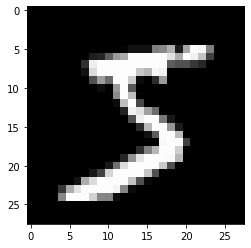

In [5]:
plt.imshow(x_train[0],cmap='gray');

In [6]:
x_train = np.reshape(x_train, (len(x_train), 28 * 28))
x_test = np.reshape(x_test, (len(x_test), 28 * 28))

In [7]:
x_train.shape

(60000, 784)

### Unsupervised Pre-Training

In [8]:
model = Sequential()
model.add(Dense(10, input_dim=28*28, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu'))
model.add(Dense(28*28, activation='linear'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 784)               8624      
                                                                 
Total params: 16,584
Trainable params: 16,584
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='mse')

In [11]:
num_epochs=10
# Train the model for some epochs
model.fit(x_train, x_train,
                epochs=num_epochs,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0548 - val_loss: 0.0400
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0396 - val_loss: 0.0390
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0393 - val_loss: 0.0386
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0384 - val_loss: 0.0377
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0381 - val_loss: 0.0376
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0381 - val_loss: 0.0375
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0379 - val_loss: 0.0373
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0377 - val_loss: 0.0370
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0370 - val_loss: 0.0362
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0365 - val_loss: 0.0359

In [12]:
# evaluate reconstruction loss
train_mse = model.evaluate(x_train, x_train, verbose=1)
test_mse = model.evaluate(x_test, x_test, verbose=1)
print(train_mse,test_mse)

313/313 [==============================] - 1s 2ms/step - loss: 0.0359
0.03633899986743927 0.03592882305383682


### Fine Tuning

In [13]:
# remember the current output layer
output_layer = model.layers[-1]

In [14]:
# remove the output layer
model.pop()

In [15]:
# mark all remaining layers as non-trainable
for layer in model.layers:
    layer.trainable = False

In [16]:
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 110
Non-trainable params: 7,960
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Train the model for some epochs
model.fit(x_train, y_train,
                epochs=num_epochs,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 2.4313 - accuracy: 0.2342 - val_loss: 1.7701 - val_accuracy: 0.3863
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 1.4871 - accuracy: 0.5441 - val_loss: 1.2468 - val_accuracy: 0.6655
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 1.1365 - accuracy: 0.6996 - val_loss: 1.0207 - val_accuracy: 0.7197
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.9716 - accuracy: 0.7336 - val_loss: 0.9006 - val_accuracy: 0.7480
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.8793 - accuracy: 0.7489 - val_loss: 0.8293 - val_accuracy: 0.7591
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.8206 - accuracy: 0.7582 - val_loss: 0.7809 - val_accuracy: 0.7670
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.7802 - accuracy: 0.7642 - val_loss: 0.7467 - val_accuracy: 0.7712
Epoch 

In [20]:
 # evaluate model
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.7788


In [21]:
print(train_acc,test_acc)

0.7730666399002075 0.7788000106811523


In [24]:
y_test[1]

2

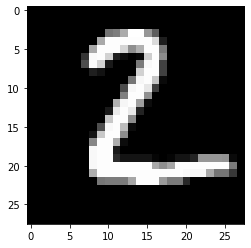

In [25]:
plt.imshow(x_test[1].reshape(28,28),cmap='gray');